In [ ]:
# 创造合成数据集
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000, n_features=100, n_classes=4, n_clusters_per_class=4, random_state=1024, n_informative=8,
)
X.shape, y.shape
xy = np.concatenate((X, y.reshape(-1, 1)), axis=1)
np.savetxt("synthetic_dataset.csv", xy, delimiter=",")

In [27]:
# 使用python进行聚类
import numpy as np
from sklearn.cluster import KMeans
import time  # 导入时间模块

# 加载数据
xy = np.loadtxt("synthetic_dataset.csv", delimiter=",")
clusters = xy[[1, 3, 6, 8], :-1]

# 创建并训练 KMeans 模型
model = KMeans(n_clusters=4, verbose=1, init=clusters)

start_time = time.perf_counter()
model.fit(xy[:, :-1])
end_time = time.perf_counter()

# 获取聚类标签
labels = model.labels_

# 将聚类标签保存到文件中
np.savetxt("cluster_labels_py.csv", labels, delimiter=",", fmt="%d")

print("聚类结果已保存到 cluster_labels_py.csv 文件中")
print("聚类耗时：{:.6f} 秒".format(end_time - start_time))

Initialization complete
Iteration 0, inertia 223996.57108819697.
Iteration 1, inertia 133893.09284519433.
Iteration 2, inertia 127134.17933029424.
Iteration 3, inertia 124744.64967980978.
Iteration 4, inertia 123752.16288596723.
Iteration 5, inertia 123196.01548775515.
Iteration 6, inertia 122940.03209585781.
Iteration 7, inertia 122771.87230658556.
Iteration 8, inertia 122714.57792221164.
Iteration 9, inertia 122689.5675326015.
Iteration 10, inertia 122680.00215217896.
Iteration 11, inertia 122674.85008420114.
Iteration 12, inertia 122670.94159870315.
Iteration 13, inertia 122667.2929958608.
Iteration 14, inertia 122665.46919850892.
Iteration 15, inertia 122664.5376677267.
Iteration 16, inertia 122662.8463860662.
Converged at iteration 16: strict convergence.
聚类结果已保存到 cluster_labels_py.csv 文件中
聚类耗时：0.008751 秒


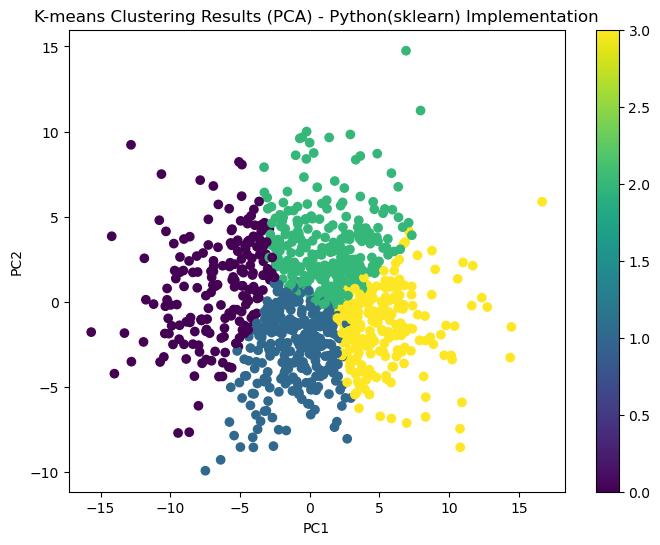

In [24]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 加载原始数据和聚类标签
xy = np.loadtxt("synthetic_dataset.csv", delimiter=",")
labels = np.loadtxt("cluster_labels_py.csv")

# 提取特征
X = xy[:, :-1]

# 使用PCA降维到2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering Results (PCA) - Python(sklearn) Implementation')
plt.show()

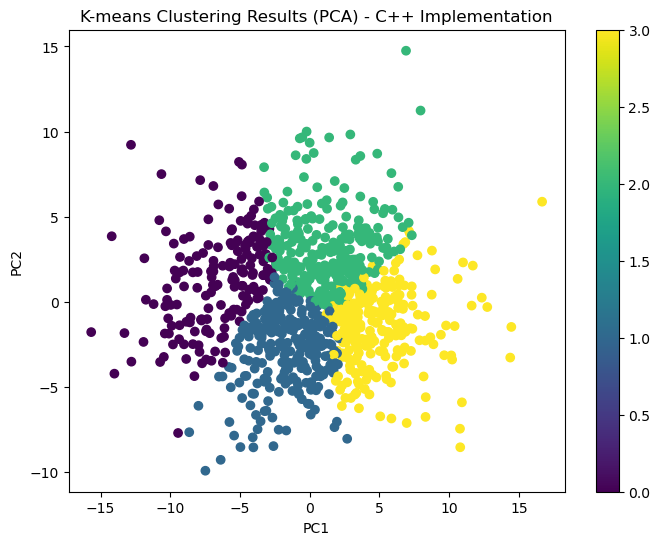

In [25]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 加载原始数据和聚类标签
xy = np.loadtxt("synthetic_dataset.csv", delimiter=",")
labels = np.loadtxt("cluster_labels_cpp.csv")

# 提取特征
X = xy[:, :-1]

# 使用PCA降维到2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可视化
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering Results (PCA) - C++ Implementation')
plt.show()